In [1]:
from math import floor, pi
import numpy as np
import matplotlib.pyplot as plt
import math as math


from helpers.simple_rocket import get_simple_rocket_change_equation_and_conditions 
from helpers.simple_eulersolve import eulersolve_while_positive
from helpers.simple_rocket_fins import get_simple_rocket_FINS_change_equation_and_conditions


# Rocket flight path modeling

In our first engineering meeting we did some rough modeling on the rockets flight path depending on a few parameters. The chosen parameters will be explained further below. A simple flight might look something like this:

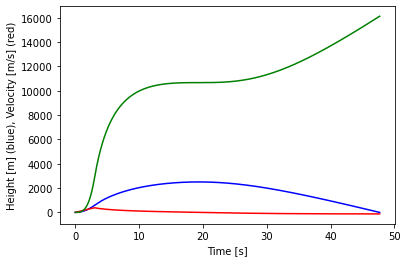

In [2]:

# burn_time, thrust, fuel_mass, dry_mass, radius, angle, radius_fins
rocket_equation, initial = get_simple_rocket_FINS_change_equation_and_conditions(3, 40, 0.1, 0.2, 0.049/2, 5, 0.04)

tvec, xvec = eulersolve_while_positive(rocket_equation, 0, initial, 0.01)


plt.plot(tvec, xvec[0:, 0:1], color = 'blue')
plt.plot(tvec, xvec[0:, 1:2], color = 'red')
plt.plot(tvec, xvec[0:, 3:4], color = 'green')

plt.xlabel('Time [s]')
plt.ylabel('Height [m] (blue), Velocity [m/s] (red)')

plt.show()

# Rocket mass optimization

This function calculates how high the rocket will fly depending on its mass. 
The formula assumes the highest powered motor that we are currently allowed to use without any special license:
- Max overall impulse according to rules: 140 N*s
- Burn time 3s
- Newton of the motor is estimated at 40, so that the overall impulse will be 120, as we assume we won't get the full specified thrust   

The drag coefficient has been set to 0.75, which is a rough estimate from NASA for well designed model rockets.
The radius should be adjusted depending on what final design will be decided. The motor itself has a radius of 0.016, so that will be the lower bound

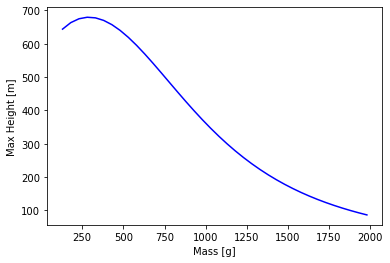

In [3]:


r = range(130, 2000, 50)
mass = np.zeros(len(r))
max_h = np.zeros(len(r))
i = 0
for m in r:

    rocket_equation, initial = get_simple_rocket_change_equation_and_conditions(3, 40, 0.1, m/1000, 0.03, 0.75)

    t_vec, x_vec = eulersolve_while_positive(rocket_equation, 0, initial, 0.01)
    max = np.max(x_vec[0:, 0:1])

    mass[i] = m
    max_h[i] = max

    i = i + 1

plt.plot(mass, max_h, color = 'blue')
plt.xlabel('Mass [g]')
plt.ylabel('Max Height [m]')


plt.show()